## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [1]:
# TODO
import pandas as pd
# URL datasetu
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"

# Načítanie datasetu do premennej `data_hf`
data_hf = pd.read_csv(url)

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [3]:
# TODO
missing_values = data_hf.isnull().sum()

print("Počet chýbajúcich hodnôt v jednotlivých stĺpcoch:")
print(missing_values)

Počet chýbajúcich hodnôt v jednotlivých stĺpcoch:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [5]:
# TODO
# Zistenie typov premenných
print(data_hf[['age', 'anaemia', 'high_blood_pressure', 'serum_sodium', 'DEATH_EVENT']].dtypes)

age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
DEATH_EVENT              int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [6]:
# TODO
# Zistenie počtu duplicitných záznamov
duplicate_rows = data_hf.duplicated().sum()

# Výpis výsledkov
print(f"Počet duplicitných záznamov v datasete: {duplicate_rows}")

Počet duplicitných záznamov v datasete: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

Počet pacientov podľa pohlavia:
sex
1    194
0    105
Name: count, dtype: int64
Podiel mužov: 64.88%
Podiel žien: 35.12%


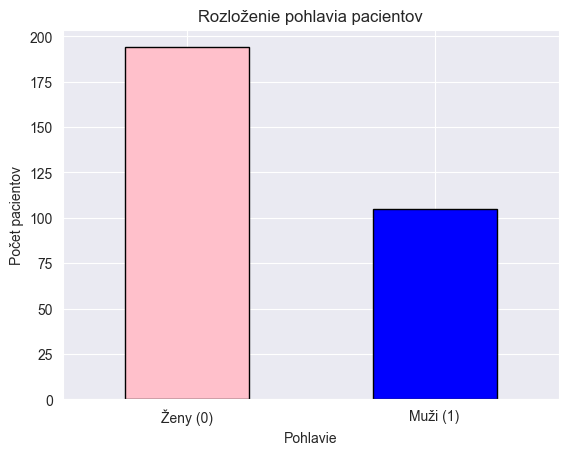

In [8]:
# TODO
# Zistenie počtu pacientov podľa pohlavia
sex_counts = data_hf['sex'].value_counts()

# Výpis výsledkov
print("Počet pacientov podľa pohlavia:")
print(sex_counts)

# Výpočet podielu mužov a žien
total_patients = len(data_hf)
male_ratio = sex_counts[1] / total_patients
female_ratio = sex_counts[0] / total_patients

# Výpis výsledkov
print(f"Podiel mužov: {male_ratio:.2%}")
print(f"Podiel žien: {female_ratio:.2%}")

import matplotlib.pyplot as plt

# Vytvorenie stĺpcového grafu
sex_counts.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')

# Pridanie popisov
plt.title('Rozloženie pohlavia pacientov')
plt.xlabel('Pohlavie')
plt.ylabel('Počet pacientov')
plt.xticks([0, 1], ['Ženy (0)', 'Muži (1)'], rotation=0)

# Zobrazenie grafu
plt.show()

**Koľko záznamov mužov a žien obsahuje dataset?**

In [6]:
# TODO
# Zistenie počtu pacientov podľa pohlavia
sex_counts = data_hf['sex'].value_counts()

# Výpis výsledkov
print("Počet pacientov podľa pohlavia:")
print(sex_counts)

Počet pacientov podľa pohlavia:
sex
1    194
0    105
Name: count, dtype: int64


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

Počet nefajčiarov podľa pohlavia:
sex
Muž     102
Žena    101
Name: count, dtype: int64


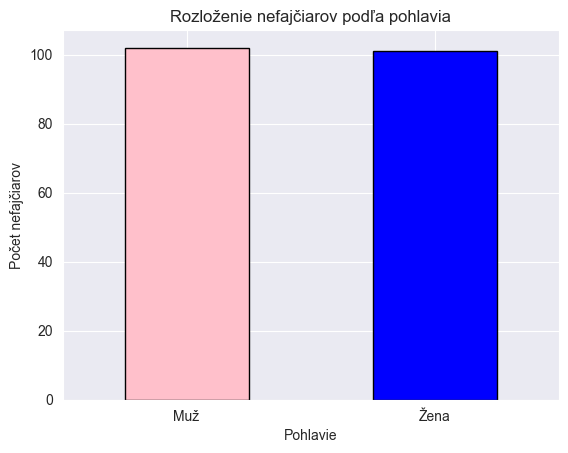

In [13]:
# TODO
# len komentar
# Filtrovanie nefajčiarov (smoking == 0)
non_smokers = data_hf[data_hf['smoking'] == 0].copy()

# Mapovanie hodnôt pohlavia na "Žena" a "Muž"
non_smokers['sex'] = non_smokers['sex'].map({0: 'Žena', 1: 'Muž'})

# Zistenie počtu nefajčiarov podľa pohlavia
non_smokers_by_sex = non_smokers['sex'].value_counts()

# Výpis výsledkov
print("Počet nefajčiarov podľa pohlavia:")
print(non_smokers_by_sex)

import matplotlib.pyplot as plt

# Vytvorenie stĺpcového grafu
non_smokers_by_sex.plot(kind='bar', color=['pink', 'blue'], edgecolor='black')

# Pridanie popisov
plt.title('Rozloženie nefajčiarov podľa pohlavia')
plt.xlabel('Pohlavie')
plt.ylabel('Počet nefajčiarov')
plt.xticks(rotation=0)  # Zabráni otočeniu popisov na osi x

# Zobrazenie grafu
plt.show()

### Úloha 3 (1b)

Popíšte premennú vek ('age').

Základné štatistiky pre premennú 'age':
count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


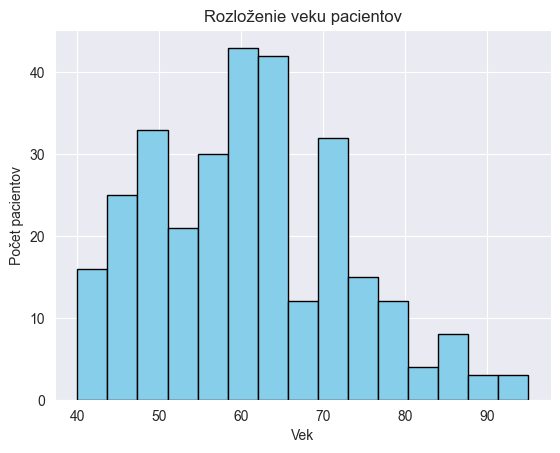

In [15]:
# TODO
# Základné štatistiky pre premennú 'age'
age_description = data_hf['age'].describe()

# Výpis výsledkov
print("Základné štatistiky pre premennú 'age':")
print(age_description)

import matplotlib.pyplot as plt

# Vytvorenie histogramu
plt.hist(data_hf['age'], bins=15, color='skyblue', edgecolor='black')

# Pridanie popisov
plt.title('Rozloženie veku pacientov')
plt.xlabel('Vek')
plt.ylabel('Počet pacientov')

# Zobrazenie grafu
plt.show()

**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [16]:
# TODO
# Základné štatistiky pre premennú 'age'
age_stats = data_hf['age'].describe()

# Výpis minimálneho, maximálneho a priemerného veku
min_age = age_stats['min']
max_age = age_stats['max']
mean_age = age_stats['mean']

print(f"Minimálny vek: {min_age} rokov")
print(f"Maximálny vek: {max_age} rokov")
print(f"Priemerný vek: {mean_age:.2f} rokov")

Minimálny vek: 40.0 rokov
Maximálny vek: 95.0 rokov
Priemerný vek: 60.83 rokov


**Z akého veku je v datasete najviac záznamov?**

In [17]:
# TODO
# Zistenie najčastejšieho veku
most_common_age = data_hf['age'].mode()[0]

# Výpis výsledku
print(f"Vek s najväčším počtom záznamov: {most_common_age} rokov")

Vek s najväčším počtom záznamov: 60.0 rokov


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

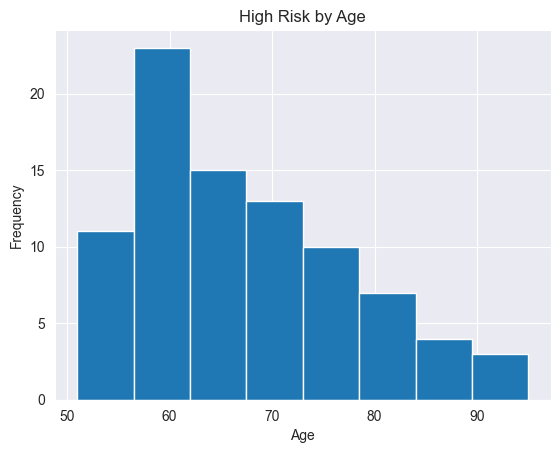

In [18]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

    age  serum_creatinine  risk
0  75.0               1.9  High
1  55.0               1.1   Low
2  65.0               1.3  High
3  50.0               1.9   Low
4  65.0               2.7  High


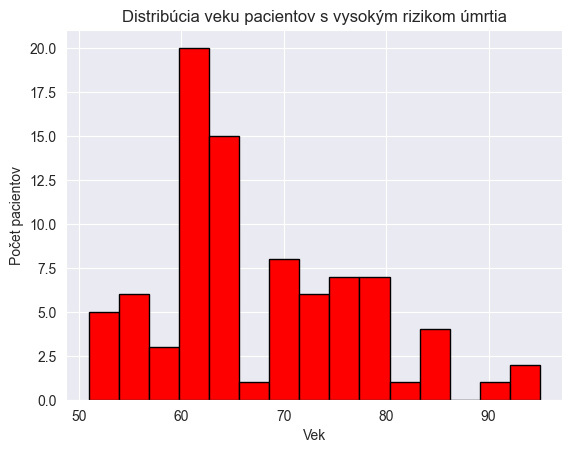

In [19]:
# TODO
# Pridanie premennej 'risk'
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Zobrazenie prvých pár riadkov na overenie
print(data_hf[['age', 'serum_creatinine', 'risk']].head())

import matplotlib.pyplot as plt

# Filtrovanie pacientov s vysokým rizikom úmrtia
high_risk_patients = data_hf[data_hf['risk'] == 'High']

# Vytvorenie histogramu pre vek pacientov s vysokým rizikom
plt.hist(high_risk_patients['age'], bins=15, color='red', edgecolor='black')

# Pridanie popisov
plt.title('Distribúcia veku pacientov s vysokým rizikom úmrtia')
plt.xlabel('Vek')
plt.ylabel('Počet pacientov')

# Zobrazenie grafu
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [22]:
# TODO
# Filtrovanie pacientov s vysokým rizikom
high_risk_patients = data_hf[data_hf['risk'] == 'High']

# Zistenie najčastejšieho veku u pacientov s vysokým rizikom
most_common_high_risk_age = high_risk_patients['age'].mode()[0]

# Výpis výsledku
print(f"Vek s najväčším rizikom zlyhania srdca: {most_common_high_risk_age} rokov")

Vek s najväčším rizikom zlyhania srdca: 60.0 rokov


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [24]:
# TODO
# Filtrovanie pacientov s vekom 60 rokov
age_60_patients = data_hf[data_hf['age'] == 60]

# Spočítanie počtu záznamov
num_age_60_patients = len(age_60_patients)

# Výpis výsledku
print(f"Počet záznamov pre vek 60 rokov: {num_age_60_patients}")

# Filtrovanie pacientov s vekom 60 rokov a vysokým rizikom
age_60_high_risk_patients = data_hf[(data_hf['age'] == 60) & (data_hf['risk'] == 'High')]

# Spočítanie počtu záznamov
num_age_60_high_risk_patients = len(age_60_high_risk_patients)

# Výpis výsledku
print(f"Počet záznamov pre vek 60 rokov s vysokým rizikom: {num_age_60_high_risk_patients}")

Počet záznamov pre vek 60 rokov: 33
Počet záznamov pre vek 60 rokov s vysokým rizikom: 18


### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
risk                         object
dtype: object
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.

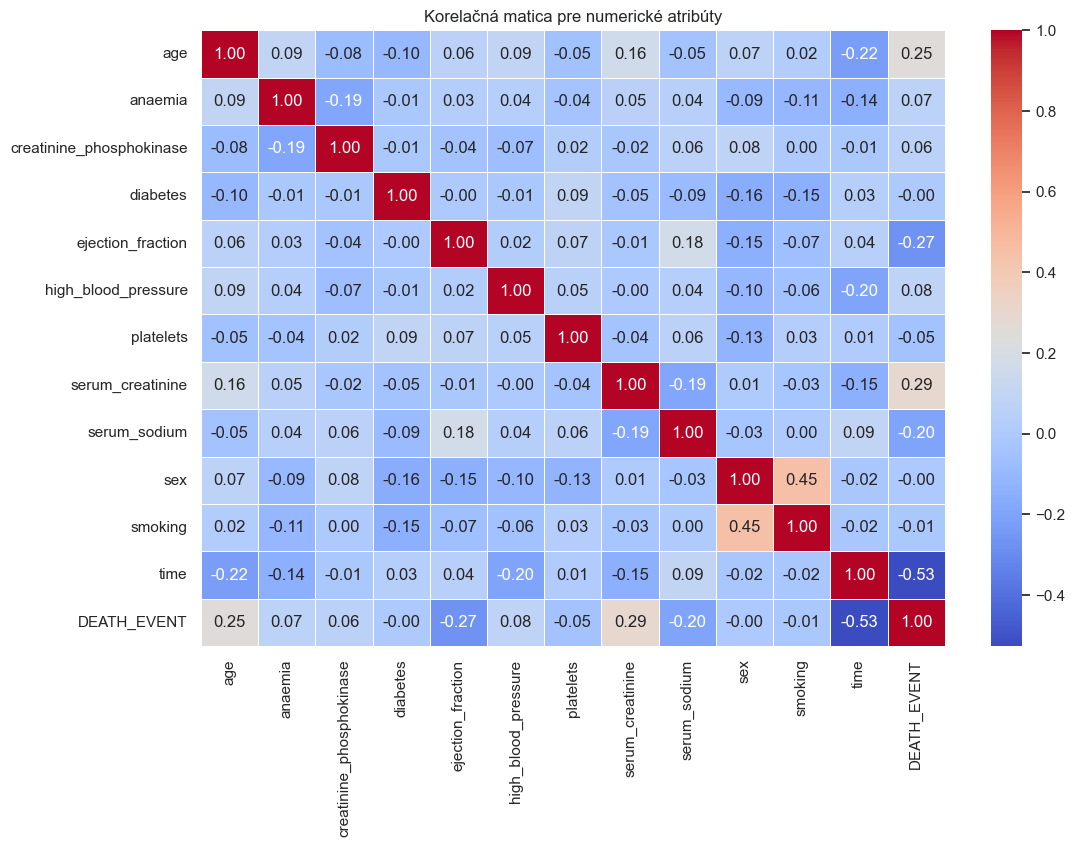

In [25]:
# TODO
# Skontrolovanie typov stĺpcov
print(data_hf.dtypes)

# Odstránenie nenumerických stĺpcov
numerical_data = data_hf.select_dtypes(include=['float64', 'int64'])

# Vytvorenie korelačnej matice
# Korelačná matica zobrazuje korelácie medzi všetkými numerickými atribútmi. Hodnoty sa pohybujú od -1 do 1:
# 1 znamená dokonalú pozitívnu koreláciu.
# -1 znamená dokonalú negatívnu koreláciu.
# 0 znamená žiadnu koreláciu.
correlation_matrix = numerical_data.corr()

# Výpis korelačnej matice
print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Nastavenie štýlu
sns.set(style="white")

# Vytvorenie heatmapy
# Heatmapa vizualizuje korelácie pomocou farieb:
# Červená: Silná pozitívna korelácia.
# Modrá: Silná negatívna korelácia.
# Biela: Žiadna korelácia.
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Pridanie popisov
plt.title('Korelačná matica pre numerické atribúty')

# Zobrazenie grafu
plt.show()

**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [27]:
# TODO
# Vytvorenie korelačnej matice
correlation_matrix = numerical_data.corr()

# Nájdenie najväčšej zápornej korelácie
negative_correlations = correlation_matrix.unstack().sort_values()

# Odstránenie duplicitných dvojíc
unique_negative_correlations = negative_correlations[negative_correlations < 0].drop_duplicates()

# Výpis prvých dvoch unikátnych dvojíc s najväčšou zápornou koreláciou
print("Prvé dve unikátne dvojice s najväčšou zápornou koreláciou:")
print(unique_negative_correlations.head(2))

Prvé dve unikátne dvojice s najväčšou zápornou koreláciou:
DEATH_EVENT        time          -0.526964
ejection_fraction  DEATH_EVENT   -0.268603
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [28]:
# TODO
# Vytvorenie korelačnej matice
correlation_matrix = numerical_data.corr()

# Nájdenie najväčšej kladnej korelácie
positive_correlations = correlation_matrix.unstack().sort_values(ascending=False)

# Výpis prvej dvojice s najväčšou kladnou koreláciou
print("Prvá dvojica s najväčšou kladnou koreláciou:")
print(positive_correlations[positive_correlations < 1].head(1))

Prvá dvojica s najväčšou kladnou koreláciou:
sex  smoking    0.445892
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure